In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
menu = pd.read_csv("C:\\Users\\Ramya\\OneDrive - Ramz Infotech\\Desktop\\EDA\\archive (2)\\menu.csv")
menu.head(2)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8


In [54]:
menu.shape

(260, 24)

In [55]:
menu.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

Check the null values

In [56]:
menu.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [57]:

[features for features in menu.columns if menu[features].isnull().sum() > 0]

[]

Check data types

In [58]:
menu.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

###Categories in menu

In [59]:
list(menu.Category.unique())

['Breakfast',
 'Beef & Pork',
 'Chicken & Fish',
 'Salads',
 'Snacks & Sides',
 'Desserts',
 'Beverages',
 'Coffee & Tea',
 'Smoothies & Shakes']

Data Analysis & Visualization

Text(0, 0.5, 'Count of orders')

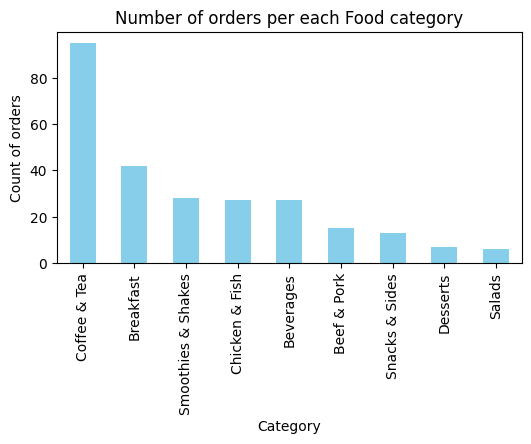

In [60]:
plt.figure(figsize= (6,3))
menu_category=menu.Category.value_counts().plot(kind='bar',color='skyblue')
plt.title('Number of orders per each Food category')
plt.xlabel('Category')
plt.ylabel('Count of orders')

In [10]:
menu_category=menu.Category.value_counts().index
menu_category

Index(['Coffee & Tea', 'Breakfast', 'Smoothies & Shakes', 'Chicken & Fish',
       'Beverages', 'Beef & Pork', 'Snacks & Sides', 'Desserts', 'Salads'],
      dtype='object', name='Category')

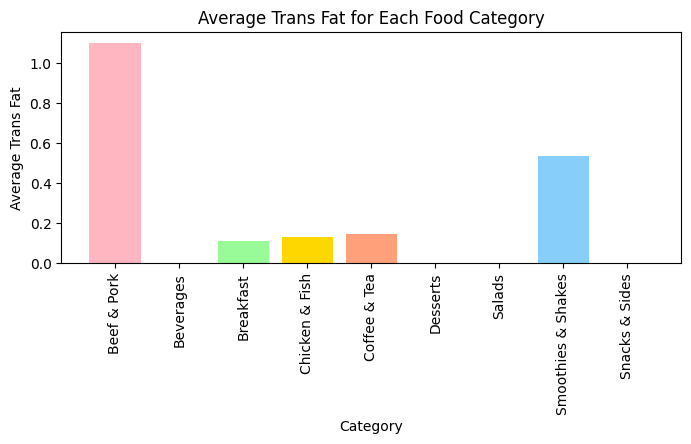

In [61]:

# Assuming 'menu' is your DataFrame
trans_val = menu.groupby('Category')['Trans Fat'].mean()
# Define pastel colors
pastel_colors = ['#FFB6C1','#87CEEB','#98FB98','#FFD700','#FFA07A','#C71585','#00FA9A','#87CEFA','#FF6347']

# Plotting the bar chart
plt.figure(figsize=(8, 3))
plt.bar(trans_val.index,trans_val,color=pastel_colors)
plt.title('Average Trans Fat for Each Food Category')
plt.xlabel('Category')
plt.ylabel('Average Trans Fat')
plt.xticks(rotation=90)

plt.show()

In [12]:
trans_val=menu.groupby('Category')['Trans Fat'].mean()
trans_val

Category
Beef & Pork           1.100000
Beverages             0.000000
Breakfast             0.107143
Chicken & Fish        0.129630
Coffee & Tea          0.142105
Desserts              0.000000
Salads                0.000000
Smoothies & Shakes    0.535714
Snacks & Sides        0.000000
Name: Trans Fat, dtype: float64

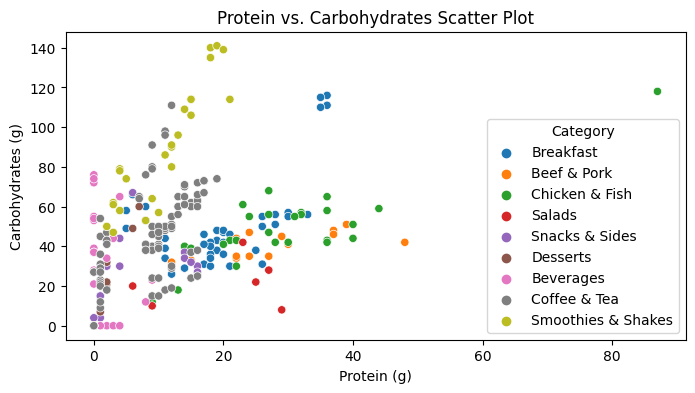

In [13]:
# create a scatter plot of protein vs. carbohydrates
plt.rc('font', family='sans-serif', size=10)
plt.subplots(figsize = (8,4), dpi = 100)
sns.scatterplot(x='Protein',hue = 'Category', y='Carbohydrates', data=menu)

# set the title and x and y axis labels
plt.title('Protein vs. Carbohydrates Scatter Plot')
plt.xlabel('Protein (g)')
plt.ylabel('Carbohydrates (g)')


# show the plot
plt.show()

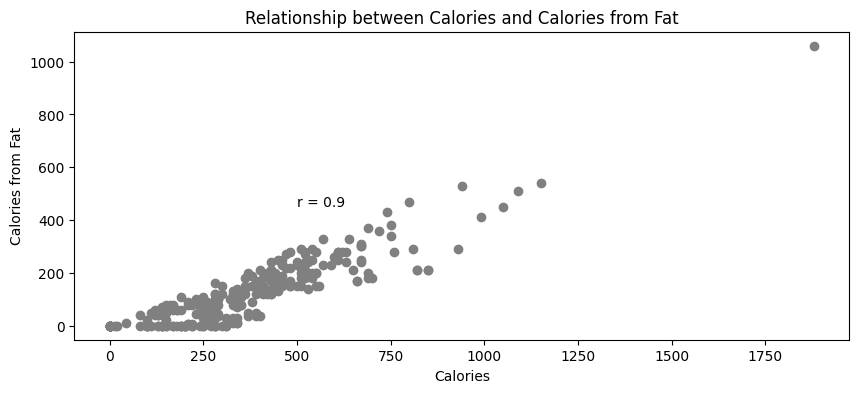

In [51]:
plt.figure(figsize=(10, 4), dpi=100)

correlation = menu['Calories'].corr(menu['Calories from Fat'])
plt.scatter(menu.Calories, menu['Calories from Fat'], color='grey')
plt.text(500,450,'r = {}'.format(round(correlation,2)))
plt.xlabel("Calories")
plt.ylabel("Calories from Fat")
plt.title("Relationship between Calories and Calories from Fat")
plt.show()

In [62]:
saturated_cholesterol = menu.groupby('Category')['Saturated Fat'].mean().dropna().nlargest(5)


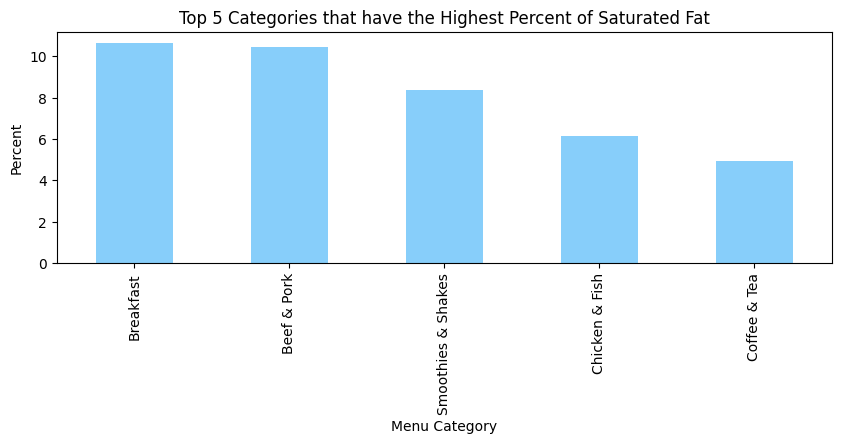

In [63]:
#Bar Graph for Percent of Saturated Fat
plt.figure(figsize=(10, 3), dpi=100)
saturated_cholesterol.sort_values(ascending=False).plot.bar(color = '#87CEFA')
plt.title("Top 5 Categories that have the Highest Percent of Saturated Fat")
plt.ylabel("Percent")
plt.xlabel("Menu Category")
plt.xticks(rotation=90)
plt.show();